# Sprint 3
## CIS 512 Final project
### Benjamin Kanouse

#### Import packages, setup constance,  and import data data.

In [1]:
import pandas as pd 
import numpy as np
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import cpi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

pd.options.display.max_rows = 9999
pd.options.display.max_columns = 100
alt.renderers.enable('notebook')

train_data = DataFrame(pd.read_csv('train.csv'))
test_data = DataFrame(pd.read_csv('test.csv'))

/anaconda3/lib/python3.7/site-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


## Sprint 1 code to clean the dataset

In [2]:
percentage_null = np.sum(test_data.isnull()) / len(test_data.index) > 0.7
bad_columns = list(percentage_null.index[percentage_null])

train_data.drop(bad_columns,axis=1,inplace=True)
test_data.drop(bad_columns,axis=1,inplace=True)


train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace = True)
train_data['MasVnrType'].fillna('None', inplace = True)
train_data['MasVnrArea'].fillna(0.0, inplace = True)
train_data['BsmtQual'].fillna('NA', inplace = True)
train_data['BsmtCond'].fillna('NA', inplace = True)
train_data['BsmtExposure'].fillna('NA', inplace = True)
train_data['BsmtFinType1'].fillna('NA', inplace = True)
train_data['BsmtFinType2'].fillna('NA', inplace = True)
train_data['Electrical'].fillna(train_data['Electrical'].dropna().value_counts().idxmax(), inplace = True)
train_data['FireplaceQu'].fillna('NA', inplace = True)
train_data['GarageType'].fillna('NA', inplace = True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean(), inplace = True)
train_data['GarageFinish'].fillna('NA', inplace = True)
train_data['GarageQual'].fillna('NA', inplace = True)
train_data['GarageCond'].fillna('NA', inplace = True)
train_data['BsmtFullBath'].fillna(0, inplace = True)
train_data['BsmtHalfBath'].fillna(0, inplace = True)
train_data['FullBath'].fillna(0, inplace = True)
train_data['HalfBath'].fillna(0, inplace = True)
train_data['BsmtUnfSF'].fillna(0, inplace = True)
train_data['TotalBsmtSF'].fillna(0, inplace = True)
train_data['GarageArea'].fillna(0, inplace = True)


test_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace = True)
test_data['MasVnrType'].fillna('None', inplace = True)
test_data['MasVnrArea'].fillna(0.0, inplace = True)
test_data['BsmtQual'].fillna('NA', inplace = True)
test_data['BsmtCond'].fillna('NA', inplace = True)
test_data['BsmtExposure'].fillna('NA', inplace = True)
test_data['BsmtFinType1'].fillna('NA', inplace = True)
test_data['BsmtFinType2'].fillna('NA', inplace = True)
test_data['Electrical'].fillna(train_data['Electrical'].dropna().value_counts().idxmax(), inplace = True)
test_data['FireplaceQu'].fillna('NA', inplace = True)
test_data['GarageType'].fillna('NA', inplace = True)
test_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean(), inplace = True)
test_data['GarageFinish'].fillna('NA', inplace = True)
test_data['GarageQual'].fillna('NA', inplace = True)
test_data['GarageCond'].fillna('NA', inplace = True)
test_data['BsmtFullBath'].fillna(0, inplace = True)
test_data['BsmtHalfBath'].fillna(0, inplace = True)
test_data['FullBath'].fillna(0, inplace = True)
test_data['HalfBath'].fillna(0, inplace = True)
test_data['BsmtUnfSF'].fillna(0, inplace = True)
test_data['TotalBsmtSF'].fillna(0, inplace = True)
test_data['GarageArea'].fillna(0, inplace = True)

## Sprint 2

In [3]:
# Drop Id since it has no meaning. Merge bathrooms together.
train_data["TotalBath"] = train_data["BsmtFullBath"] + train_data["FullBath"] + train_data["BsmtHalfBath"] / 2 + train_data["HalfBath"] / 2
test_data["TotalBath"] = test_data["BsmtFullBath"] + test_data["FullBath"] + test_data["BsmtHalfBath"] / 2 + test_data["HalfBath"] / 2

train_data.drop(["Id", "BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath"], axis=1, inplace=True)
test_data.drop(["Id", "BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath"], axis=1, inplace=True)

# TotalBsmtSF is the sum of the two BsmtFinSF1 and BsmtFinSF2. So we don't need the extra variables.
train_data.drop(["BsmtFinSF1", "BsmtFinSF2"], axis=1, inplace=True)
test_data.drop(["BsmtFinSF1", "BsmtFinSF2"], axis=1, inplace=True)

# GrLivArea is the sum of the two 1stFlrSF and 2ndFlrSF. So we don't need the extra variables.
train_data.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
test_data.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

train_data.drop(["TotRmsAbvGrd", "GarageYrBlt", "GarageCars"], axis=1, inplace=True)
test_data.drop(["TotRmsAbvGrd", "GarageYrBlt", "GarageCars"], axis=1, inplace=True)
train_data.drop(["MiscVal", "LowQualFinSF", "YrSold", "3SsnPorch", "MoSold"], axis=1, inplace=True)
test_data.drop(["MiscVal", "LowQualFinSF", "YrSold", "3SsnPorch", "MoSold"], axis=1, inplace=True)

## Prepare data for predictive models

In [4]:
X_trained = train_data.copy()
Y_trained = train_data['SalePrice']
X_trained.drop(['SalePrice'], axis=1, inplace=True)

In [5]:
print(train_data.shape)
print(test_data.shape)
print(X_trained.shape)

(1460, 61)
(1459, 60)
(1460, 60)


In [6]:
max_train_index = X_trained.index.max()
test_data.index = test_data.index + max_train_index + 1
full_x = pd.concat([X_trained, test_data]).reindex()
full_x.shape

(2919, 60)

In [7]:
obj_features = full_x.dtypes[full_x.dtypes == object].index.to_numpy()

for feature in obj_features:
    dummyZoning = pd.get_dummies(full_x[feature])
    dummyZoning = dummyZoning.add_prefix(feature + " ")
    full_x = full_x.join(dummyZoning)
    full_x.drop([feature], axis=1, inplace=True)

In [8]:
full_x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,TotalBath,MSZoning C (all),MSZoning FV,MSZoning RH,MSZoning RL,MSZoning RM,Street Grvl,Street Pave,LotShape IR1,LotShape IR2,LotShape IR3,LotShape Reg,LandContour Bnk,LandContour HLS,LandContour Low,LandContour Lvl,Utilities AllPub,Utilities NoSeWa,LotConfig Corner,LotConfig CulDSac,LotConfig FR2,LotConfig FR3,LotConfig Inside,LandSlope Gtl,LandSlope Mod,LandSlope Sev,Neighborhood Blmngtn,Neighborhood Blueste,Neighborhood BrDale,Neighborhood BrkSide,...,Functional Mod,Functional Sev,Functional Typ,FireplaceQu Ex,FireplaceQu Fa,FireplaceQu Gd,FireplaceQu NA,FireplaceQu Po,FireplaceQu TA,GarageType 2Types,GarageType Attchd,GarageType Basment,GarageType BuiltIn,GarageType CarPort,GarageType Detchd,GarageType NA,GarageFinish Fin,GarageFinish NA,GarageFinish RFn,GarageFinish Unf,GarageQual Ex,GarageQual Fa,GarageQual Gd,GarageQual NA,GarageQual Po,GarageQual TA,GarageCond Ex,GarageCond Fa,GarageCond Gd,GarageCond NA,GarageCond Po,GarageCond TA,PavedDrive N,PavedDrive P,PavedDrive Y,SaleType COD,SaleType CWD,SaleType Con,SaleType ConLD,SaleType ConLI,SaleType ConLw,SaleType New,SaleType Oth,SaleType WD,SaleCondition Abnorml,SaleCondition AdjLand,SaleCondition Alloca,SaleCondition Family,SaleCondition Normal,SaleCondition Partial
0,60,65.0,8450,7,5,2003,2003,196.0,150.0,856.0,1710,3,1,0,548.0,0,61,0,0,0,3.5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,284.0,1262.0,1262,3,1,1,460.0,298,0,0,0,0,2.5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,434.0,920.0,1786,3,1,1,608.0,0,42,0,0,0,3.5,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,540.0,756.0,1717,3,1,1,642.0,0,35,272,0,0,2.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,490.0,1145.0,2198,4,1,1,836.0,192,84,0,0,0,3.5,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [9]:
x_full_np = StandardScaler().fit_transform(full_x)

In [10]:
X_trained_np = x_full_np[:max_train_index+1]
X_final_test = x_full_np[max_train_index+1:]

## Split data into a train and validation datasets

In [11]:
number_of_samples = len(X_trained_np)

np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_trains = X_trained_np[random_indices[:num_training_samples]]
y_trains = Y_trained[random_indices[:num_training_samples]]
x_tests = X_trained_np[random_indices[num_training_samples:]]
y_tests = Y_trained[random_indices[num_training_samples:]]
y_trains = list(y_trains)
y_tests = list(y_tests)

# Regressions

#### Set up helper functions

In [12]:
def print_error_message(y_actual, y_predicted, data_prefix, model_name):
    error = 0
    for i in range(len(y_actual)):
        error += (abs(y_predicted[i]-y_actual[i])/y_actual[i])
    error_percent = error/len(y_actual) * 100
    print(f'{data_prefix} error = {round(error_percent, 2)}% in {model_name}')


## Random Forest Regression

In [13]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = params, n_iter = 100, cv = 3, verbose =2, random_state = 42, n_jobs = -1)
rf_random.fit(x_trains, y_trains)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [143]:
regressor = RandomForestRegressor(n_estimators = 100,
 min_samples_split = 2,
 min_samples_leaf = 2,
 max_depth = 30)

regressor.fit(x_trains, y_trains)
y1_rfo = list(regressor.predict(x_trains))
y2_rfo = list(regressor.predict(x_tests))

print_error_message(y_trains, y1_rfo, "Train", "Random Forest Regression")
print_error_message(y_tests, y2_rfo, "Validate", "Random Forest Regression")

Train error = 4.51% in Random Forest Regression
Validate error = 9.5% in Random Forest Regression


# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

params = { 'alpha': [i for i in range(1, 101)] }

ridge_reg = GridSearchCV(Ridge(), param_grid = params,
                        scoring = 'neg_mean_squared_error',
                        cv = 5)

ridge_reg.fit(x_trains, y_trains)
ridge_ytrain = ridge_reg.predict(x_trains)
ridge_yhat = ridge_reg.predict(x_tests)

print(f'r2_square on test set: {r2_score(y_tests, ridge_yhat)}')
print(f'The best value of Alpha is: {ridge_reg.best_params_}')
print_error_message(y_trains, ridge_ytrain, "Train", "Ridge Regression")
print_error_message(y_tests, ridge_yhat, "Validate", "Ridge Regression")

r2_square on test set: 0.903209979619064
The best value of Alpha is: {'alpha': 100}
Train error = 8.12% in Ridge Regression
Validate error = 8.53% in Ridge Regression


# Lasso Regression

In [16]:
@ignore_warnings(category=ConvergenceWarning)
def lasso_no_warnings(x, y):
    parameters = {'alpha': [0.0001, 0.0009, 0.001, 0.002, 0.002, 0.01, 0.1, 1, 10, 100]}
    lasso_reg = GridSearchCV(Lasso(), param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
    return lasso_reg.fit(x, y)

lasso_reg = lasso_no_warnings(x_trains, y_trains)
lasso_ytrain = lasso_reg.predict(x_trains)
lasso_yhat = lasso_reg.predict(x_tests)


print(f'rmse on train set: {np.sqrt(mse(y_trains, lasso_ytrain))}')
print(f'rmse on test set: {np.sqrt(mse(y_tests, lasso_yhat))}')
print(f'r2_square on test set: {r2_score(y_tests, lasso_yhat)}')
print(f'The best value of Alpha is: {lasso_reg.best_params_}')
print_error_message(y_trains, lasso_ytrain, "Train", "Ridge Regression")
print_error_message(y_tests, lasso_yhat, "Validate", "Ridge Regression")

rmse on train set: 21624.24796408987
rmse on test set: 21808.399008319277
r2_square on test set: 0.903612663967238
The best value of Alpha is: {'alpha': 100}
Train error = 8.06% in Ridge Regression
Validate error = 8.73% in Ridge Regression


In [73]:
lasso_prediction = lasso_reg.predict(X_final_test)

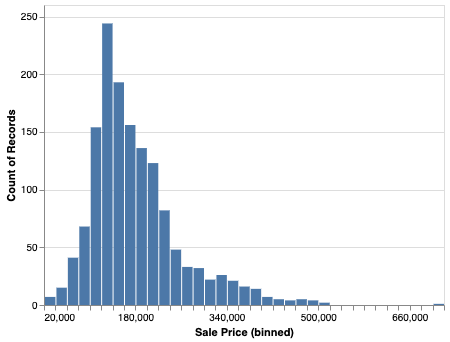

In [74]:
lasso_prediction = pd.DataFrame({'Sale Price': lasso_prediction})
alt.Chart(lasso_prediction).mark_bar().encode(
    alt.X('Sale Price', bin=alt.Bin(maxbins=50)),
    y='count()',
)

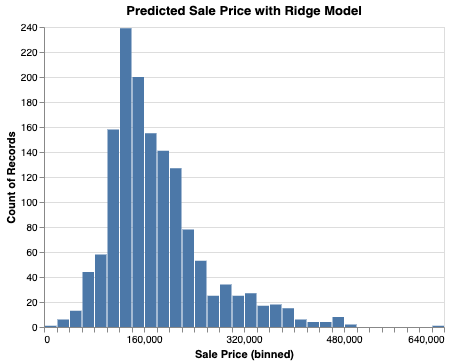

In [71]:
ridge_prediction = ridge_reg.predict(X_final_test)
ridge_prediction = pd.DataFrame({'Sale Price': ridge_prediction})
ridge_graph = alt.Chart(ridge_prediction).mark_bar().encode(
    alt.X('Sale Price', bin=alt.Bin(maxbins=50)),
    y='count()',
).properties(
  title='Predicted Sale Price with Ridge Model'
)
ridge_graph

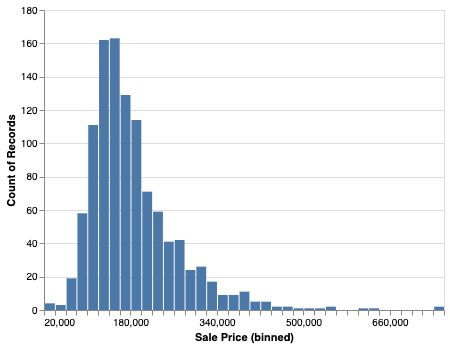

In [58]:
y_trains_graph = pd.DataFrame({'Sale Price': y_trains})
train_graph = alt.Chart(y_trains_graph).mark_bar().encode(
    alt.X("Sale Price", bin=alt.Bin(maxbins=50)),
    y='count()',
)
train_graph

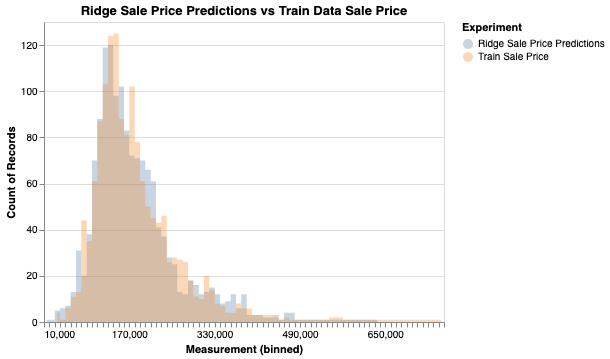

In [139]:
all_3 = pd.DataFrame({'Ridge Sale Price Predictions': ridge_prediction["Sale Price"].to_numpy(), 'Lasso Estimate': lasso_prediction["Sale Price"].to_numpy(), 'Train Sale Price': train_data[:-1]["SalePrice"].to_numpy()})

alt.Chart(all_3).transform_fold(
    ['Ridge Sale Price Predictions', 'Train Sale Price'],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')
).properties(
  title='Ridge Sale Price Predictions vs Train Data Sale Price'
)

In [142]:
ridge_prediction["Sale Price"].mean()

179396.76165190325

In [141]:
train_data["SalePrice"].mean()

180921.19589041095

In [22]:
print_error_message(lasso_reg.predict(X_final_test), ridge_reg.predict(X_final_test), "Train", "Ridge Regression")

Train error = 2.69% in Ridge Regression


In [23]:
both_yhat = ( lasso_reg.predict(x_tests) + ridge_reg.predict(x_tests) ) / 2
print_error_message(y_tests, both_yhat, "Validate", "Ridge Regression")

Validate error = 8.57% in Ridge Regression


In [25]:
ridge_ytrain

array([241204.41607017, 144682.48009241, 108275.30387502, ...,
        83207.63380693, 216804.96573393, 133738.78905736])

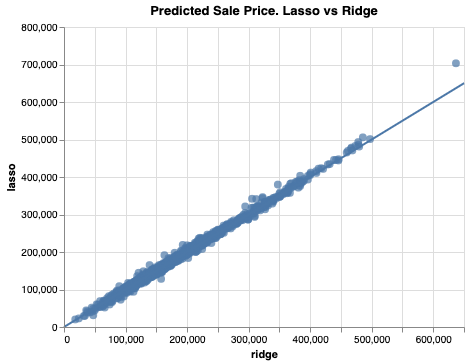

In [48]:
df = pd.DataFrame({'ridge': ridge_reg.predict(X_final_test), 'lasso': lasso_reg.predict(X_final_test)})

chart_thing = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('ridge', axis=alt.Axis(title="ridge")),
    y=alt.Y('lasso', axis=alt.Axis(title="lasso"))
).properties(
  title='Predicted Sale Price. Lasso vs Ridge'
)

df_line = pd.DataFrame({'x': [0,650000], 'y': [0,650000]})
line = alt.Chart(df_line).mark_line().encode(
    x=alt.X('x', axis=alt.Axis(title=None)),
    y=alt.Y('y', axis=alt.Axis(title=None))
)

chart_thing + line